In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("Sales Transaction v.4a.csv")

# Drop unnecessary columns
df = df.drop(columns=["Country", "ProductName", "TransactionNo", "ProductNo", "Date"])

# Fill missing CustomerNo with the most frequent value (mode)
df["CustomerNo"] = df["CustomerNo"].fillna(df["CustomerNo"].mode()[0])

# Calculate "Total_Spent" per transaction
df["Total_Spent"] = df["Price"] * df["Quantity"]

# Calculate frequency of transactions per customer
df["Frequency"] = df["CustomerNo"].map(df["CustomerNo"].value_counts())

# Calculate total spent per customer
df["Total_Spent"] = df.groupby("CustomerNo")["Total_Spent"].transform("sum")

# Calculate average spent per customer
df["Average_Spent"] = df["Total_Spent"] / df["Frequency"]

# Drop the "Price" and "Quantity" columns as they're no longer needed
df = df.drop(columns=["Price", "Quantity"])
print(df.isnull().sum())

# Standardize the relevant columns
scaler = StandardScaler()
df_new = df.drop_duplicates(subset="CustomerNo").reset_index(drop=True)
df_new[["Total_Spent", "Frequency", "Average_Spent"]] = scaler.fit_transform(df_new[["Total_Spent", "Frequency", "Average_Spent"]])
df_new = df_new.drop(columns=["CustomerNo"])

# Check for any missing values
# Display the first 5 rows of the processed DataFrame
print(df_new.head())


CustomerNo       0
Total_Spent      0
Frequency        0
Average_Spent    0
dtype: int64
   Total_Spent  Frequency  Average_Spent
0    -0.000118  -0.118195      -0.034582
1     0.919817   1.495364      -0.045054
2     2.033761   1.281620       0.021107
3     0.255001   0.187752      -0.029082
4     0.342292   1.260665      -0.068682


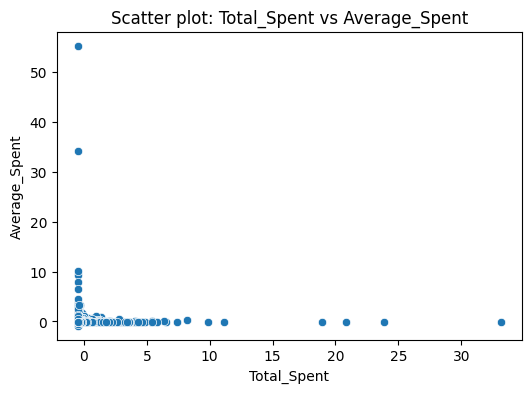

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot between Total_Spent and Average_Spent
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_new["Frequency"], y=df_new["Average_Spent"])
plt.title("Scatter plot: Total_Spent vs Average_Spent")
plt.xlabel("Total_Spent")
plt.ylabel("Average_Spent")
plt.show()

               Total_Spent  Frequency  Average_Spent
Total_Spent       1.000000   0.437585       0.170185
Frequency         0.437585   1.000000      -0.024216
Average_Spent     0.170185  -0.024216       1.000000


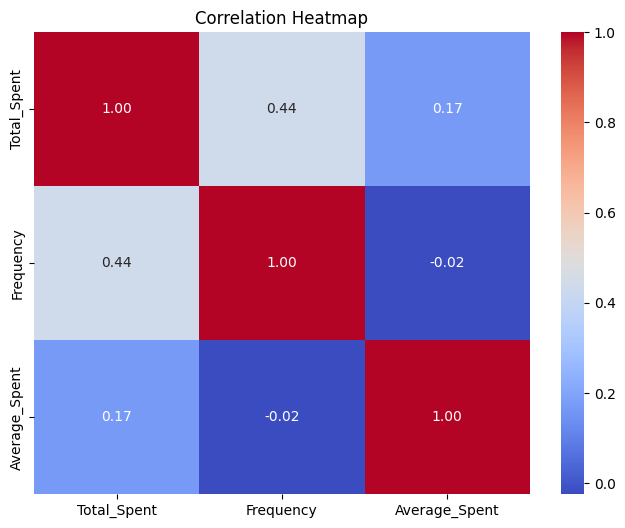

In [4]:
# # Pair plot to see relationships between Total_Spent, Frequency, and Average_Spent
# sns.pairplot(df_new)
# plt.show()
# # Heatmap of the correlation matrix
# Calculate correlation matrix
correlation_matrix = df_new.corr()

# Display the correlation matrix
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


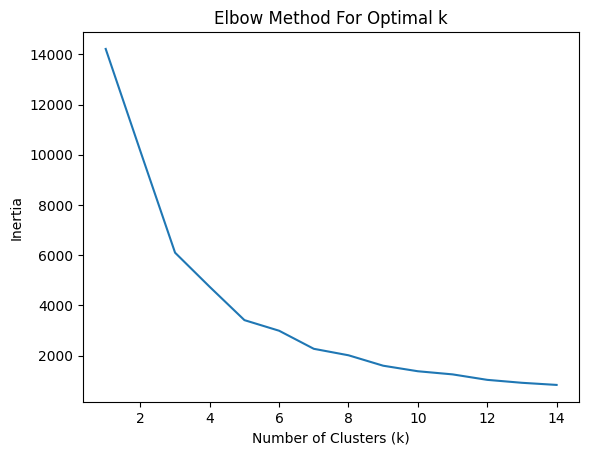

In [5]:
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 15):
    kmean = KMeans(n_clusters=i, random_state=2024, init="k-means++")
    kmean.fit(df_new)
    inertia.append(kmean.inertia_)

plt.plot(range(1, 15), inertia)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

Silhouette Score: 0.7277909774043108


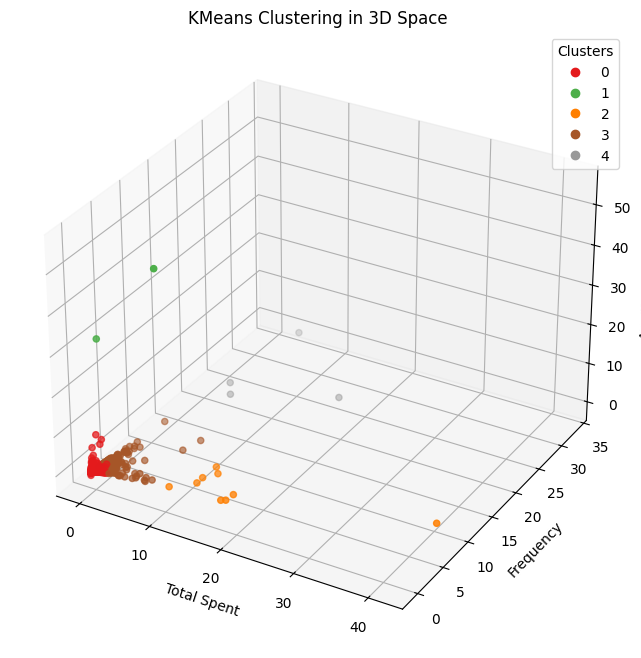

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply KMeans
model = KMeans(n_clusters=5, random_state=2024, init="k-means++")
df_new['Cluster'] = model.fit_predict(df_new[["Total_Spent", "Frequency", "Average_Spent"]])

# Calculate Silhouette Score
silhouette = silhouette_score(df_new[["Total_Spent", "Frequency", "Average_Spent"]], df_new['Cluster'])
print(f"Silhouette Score: {silhouette}")

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
scatter = ax.scatter(df_new['Total_Spent'], df_new['Frequency'], df_new['Average_Spent'], c=df_new['Cluster'], cmap='Set1')

# Labels and title
ax.set_xlabel('Total Spent')
ax.set_ylabel('Frequency')
ax.set_zlabel('Average Spent')
ax.set_title('KMeans Clustering in 3D Space')

# Show the color legend for the clusters
plt.legend(*scatter.legend_elements(), title="Clusters")

# Display the plot
plt.show()
